### Import data

In [132]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc_, pop_l, g2_l, g1_l, g2_0_l, g1_0_l = setup_data("lapatinib");
conc, pop_g, g2_g, g1_g, g2_0_g, g1_0_g = setup_data("gemcitabine");
conc_l = append!([0.1], conc_[2:end]);
conc_g = append!([0.1], conc[2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization
Lapatinib & gemcitabine

In [21]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, ec50_gamma1, gamma1_max, ec50_gamma2, gamma2_max]
# Lapatinib
ec50lowL = 50.0
ec50highL = 500.0
ec50guessL = 100.0
guessL = [ec50guessL, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 15.0, 15.0, 20.0, 20.94827, ec50guessL, 0.00294624, ec50guessL, 0.0422821]

# Gemcitabine
ec50lowg = 10.0
ec50highg = 80.0
ec50guessg = 40.0
guessg = [ec50guessg, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 20.0, 20.0, 15.0, 15.94827, ec50guessg, 0.00294624, ec50guessg, 0.0422821]

# max num of steps
num_steps=8000;

# best_fit, paramsL = optimize_hill(guessL, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps, ec50lowL, ec50highL)

In [22]:

best_fitL, paramsL = optimize_hill(guessL, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps, ec50lowL, ec50highL)
best_fitG, paramsG = optimize_hill(guessg, conc_g, g1_g, g2_g, g1_0_g, g2_0_g, num_steps, ec50lowg, ec50highg)


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
100.07 secs, 655 evals, 555 steps, improv/step: 0.377 (last = 0.3766), fitness=23383.475925412
200.09 secs, 1308 evals, 1208 steps, improv/step: 0.324 (last = 0.2787), fitness=19848.101947302
300.20 secs, 1953 evals, 1853 steps, improv/step: 0.297 (last = 0.2481), fitness=13985.190106247
400.28 secs, 2605 evals, 2505 steps, improv/step: 0.287 (last = 0.2592), fitness=10905.060618597
500.34 secs, 3264 evals, 3164 steps, improv/step: 0.271 (last = 0.2079), fitness=10410.368427961
600.45 secs, 3929 evals, 3829 steps, improv/step: 0.254 (last = 0.1759), fitness=9870.671536186
700.52 secs, 4587 evals, 4487 steps, improv/step: 0.246 (last = 0.1991), fitness=9125.324325998
800.53 secs, 5234 evals, 5134 steps, improv/step: 0.237 (last = 0.1747), fitness=8963.945725170
900.61 secs, 5887 evals, 578

(15419.926961607734, [10.013485865896794, 3.127537416368199, 0.03107471980575912, 0.05327505845713095, 0.009325802715608704, 0.025165656107519814, 17.936730540905202, 5.167582044666436, 29.400224353534487, 5.455711424841172, 10.177031771743515, 0.008888908957750928, 17.40240516793202, 0.009277544852223261])

In [23]:
parsL=getDDEparams(paramsL, conc_l)
parsG=getDDEparams(paramsG, conc_g)

6×8 Array{Float64,2}:
 0.053275     0.0532748   0.0532586   …   0.03177      0.0310913 
 0.0251656    0.0251655   0.0251539       0.00982188   0.00933765
 5.16759      5.16771     5.17705        17.5368      17.9272    
 5.45572      5.45594     5.47347        28.6503      29.3823    
 4.67668e-9   8.21309e-8  6.26858e-6      0.00859653   0.00888191
 9.11683e-10  1.60109e-8  1.22271e-6  …   0.00784839   0.00923859

### Plot the data with the new set of parameters for DDE

#### Lapatinib

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/plot.jl:29


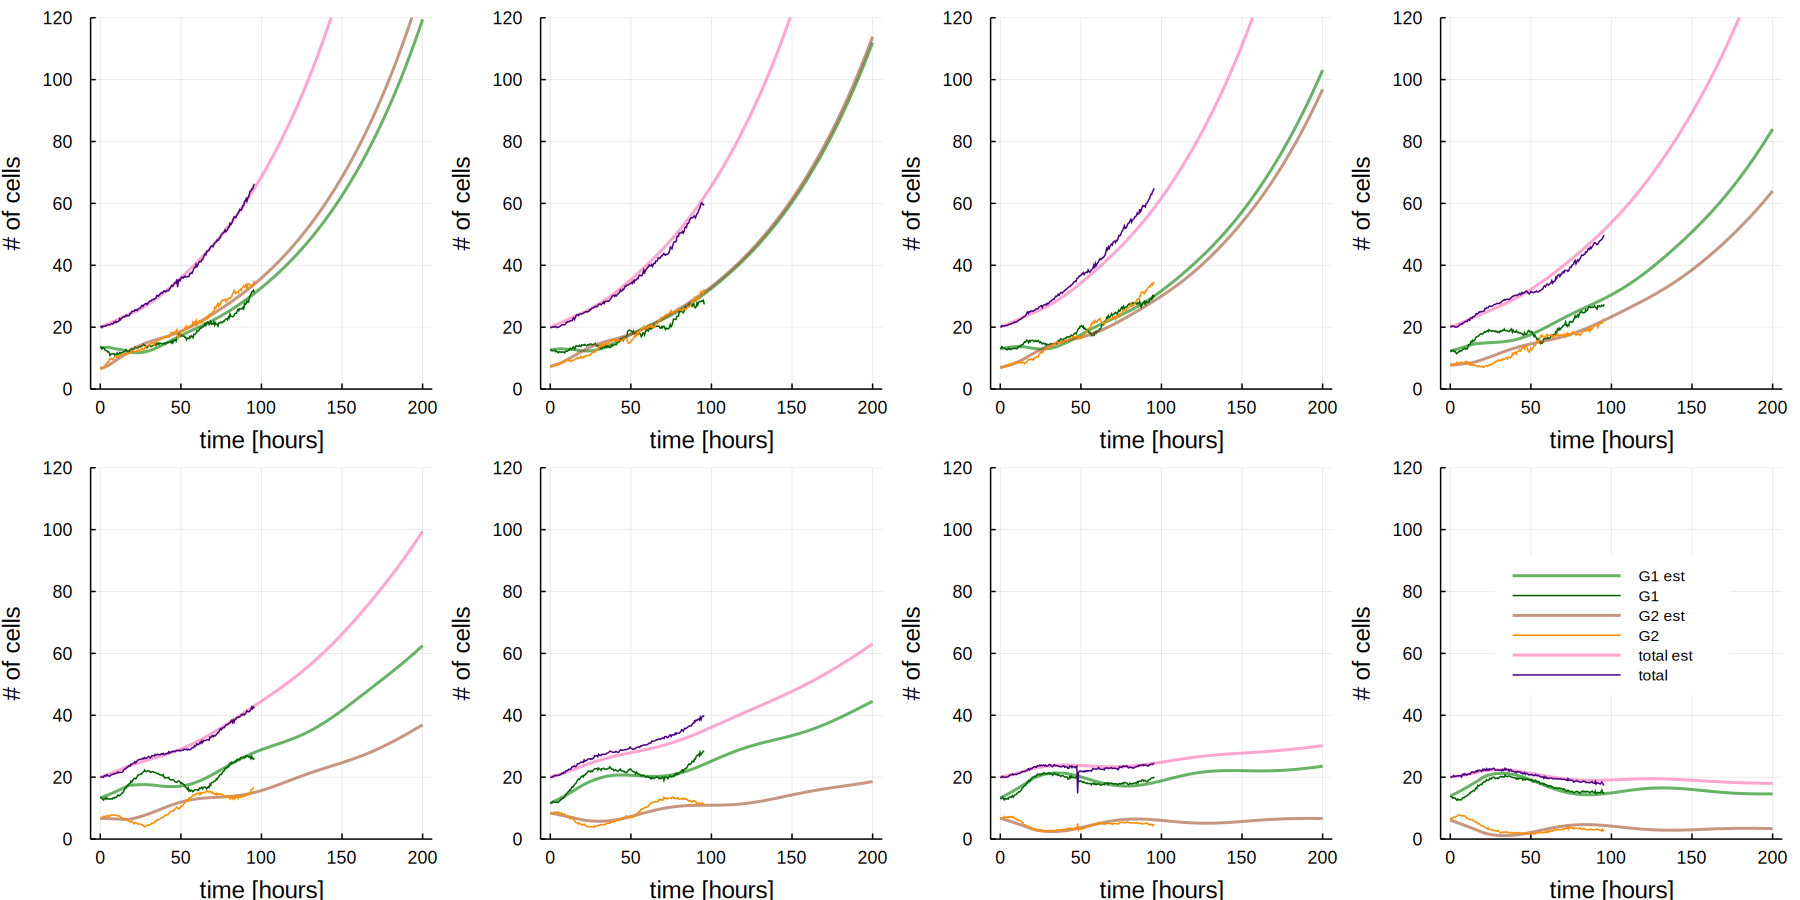

In [24]:
plot_all(parsL, pop_l, g2_l, g1_l, g2_0_l, g1_0_l)

#### Gemcitabine

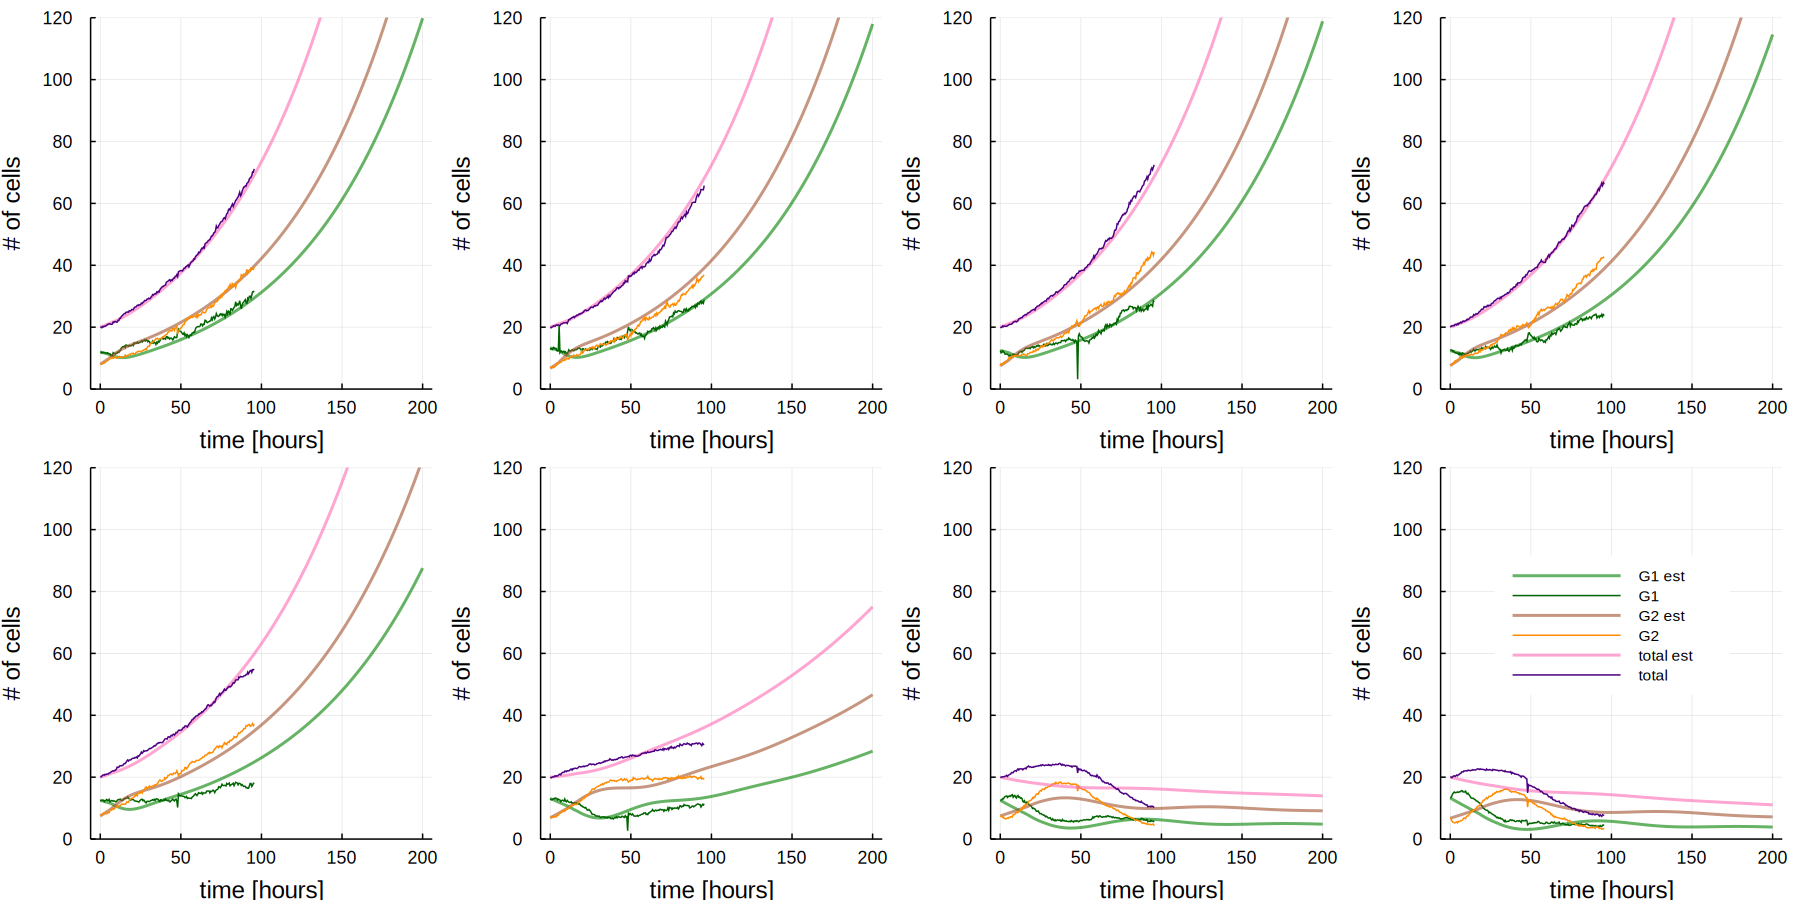

In [25]:
plot_all(parsG, pop_g, g2_g, g1_g, g2_0_g, g1_0_g)

In [26]:
savefig("gemcitabine.png")

### Plot Hill curve for all of the DDE model parameters

#### Lapatinib

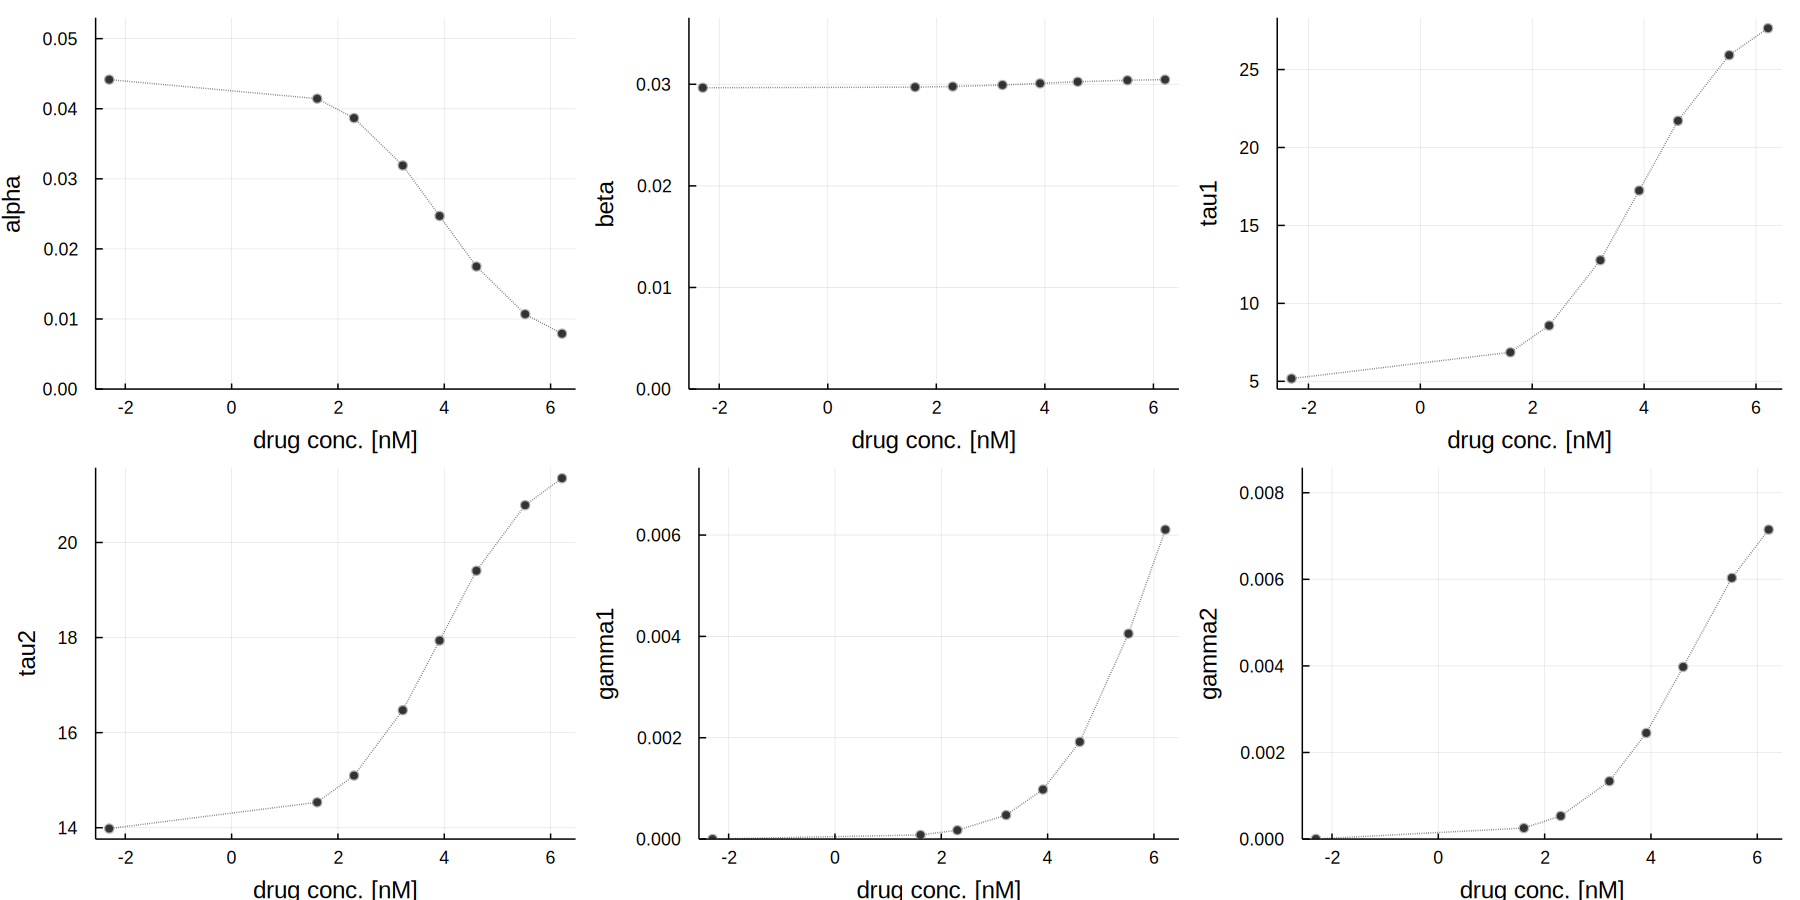

In [27]:
plot_parameters(conc_l, parsL)

#### Gemcitabine

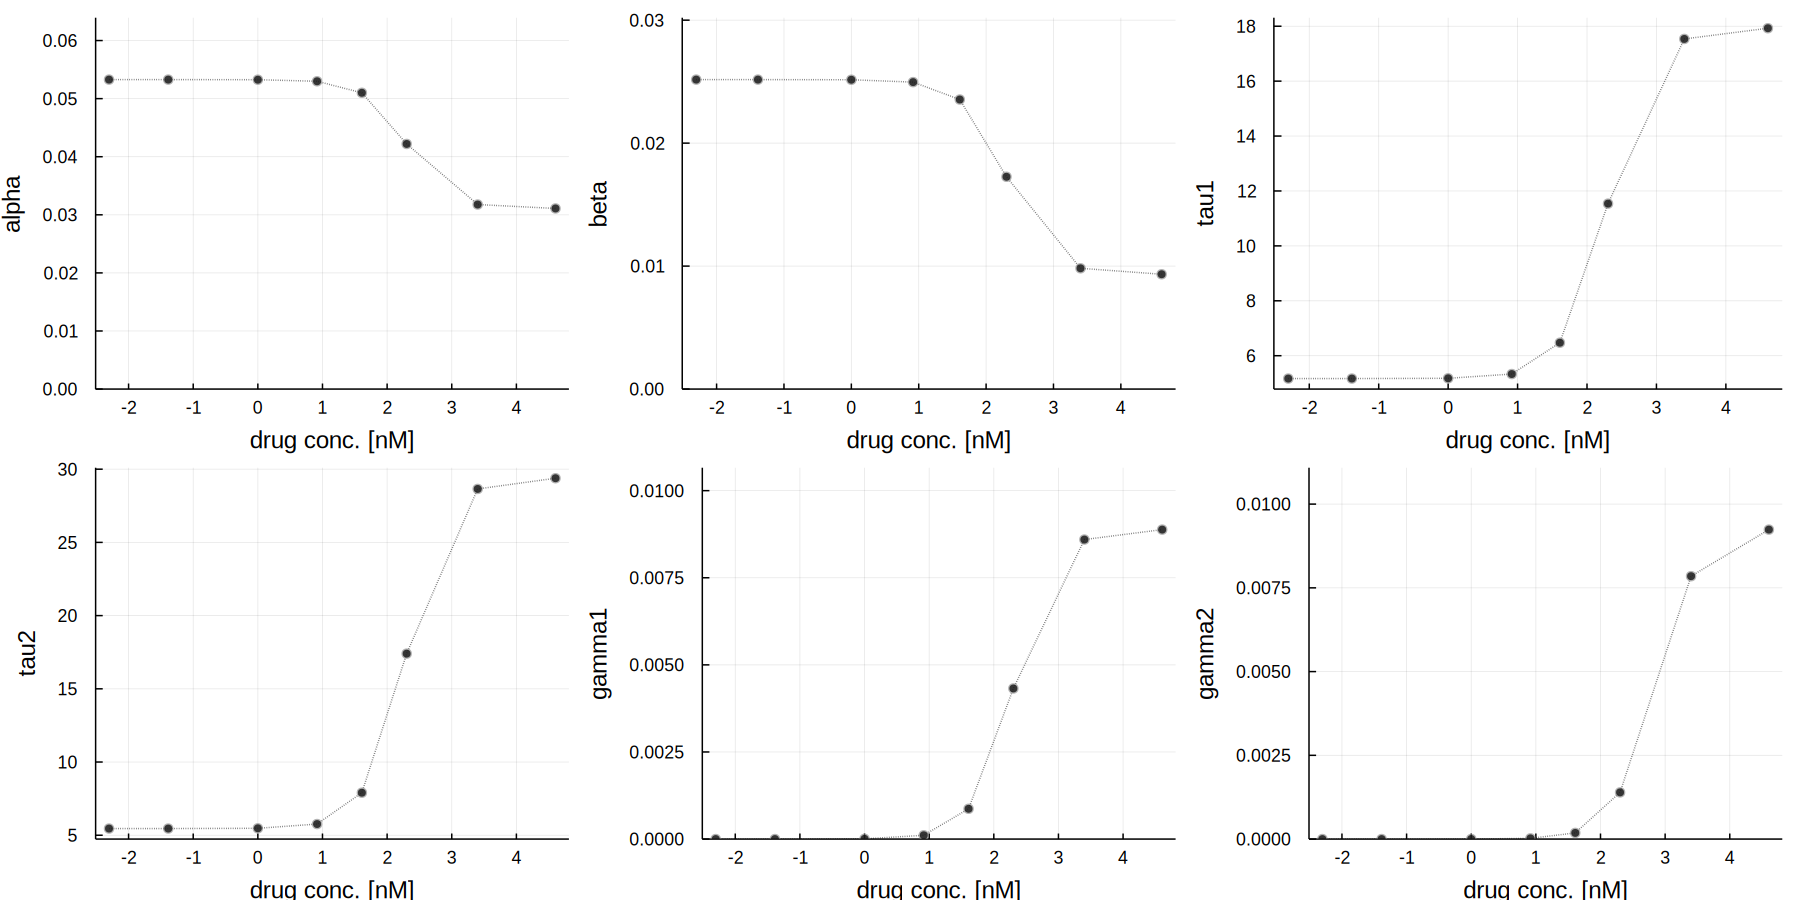

In [28]:
plot_parameters(conc_g, parsG)

In [29]:
savefig("gempar.png")

#### Bliss combination

$\alpha$

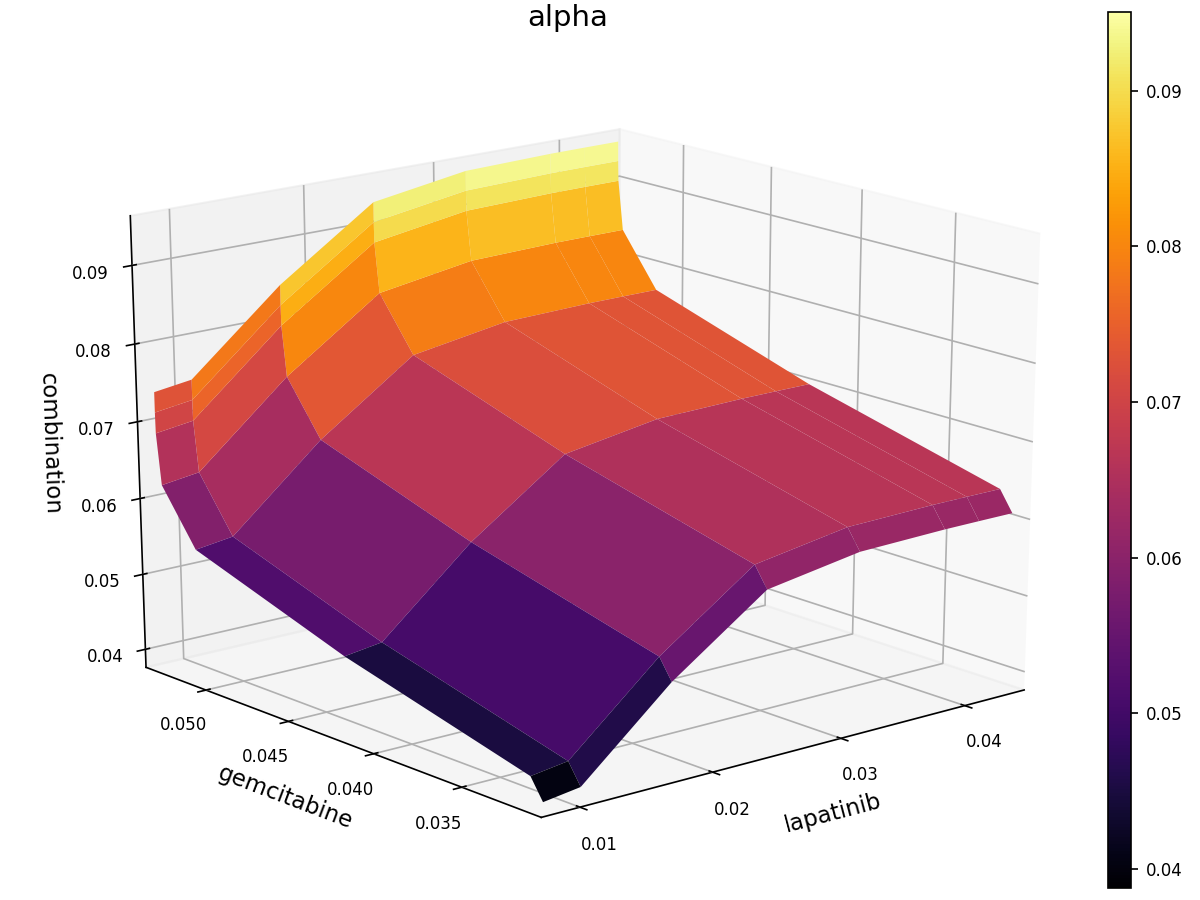

In [30]:
using Plots; pyplot();
function plot3D(parsL, parsG, j::Int, title::String)

    param1 = ParamForBliss(parsL)
    param2 = ParamForBliss(parsG)
    combin = BlissCombination(parsL, parsG)

    plot(param1[j,:],param2[j,:],combin[:,:,j],st=:surface,camera=(-40,20), xlabel="lapatinib", ylabel="gemcitabine", zlabel="combination", title=title)
    plot!(size = (800, 600), dpi=150)
end
plot3D(parsL, parsG, 1, "alpha")

In [41]:
param1 = ParamForBliss(parsL)
param2 = ParamForBliss(parsG)
combin = BlissCombination(parsL, parsG)

# using CSV, DataFrames
# CSV.write("parsL.csv",  DataFrame(parsL), writeheader=false)
# CSV.write("parsG.csv",  DataFrame(parsG), writeheader=false)


"parsG.csv"

In [33]:
savefig("alpha.png")

$\beta$

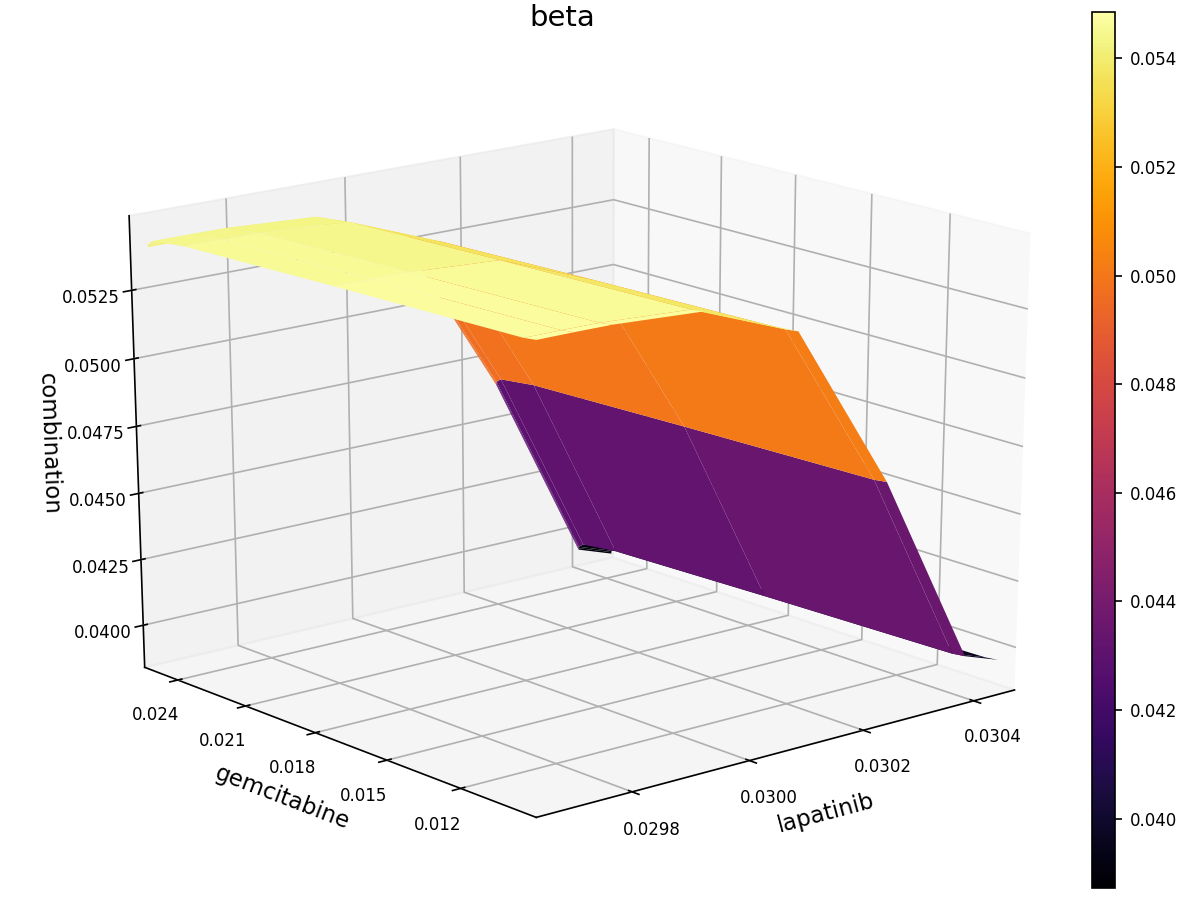

In [34]:
plot3D(parsL, parsG, 2, "beta")
savefig("beta.png")

$\gamma$

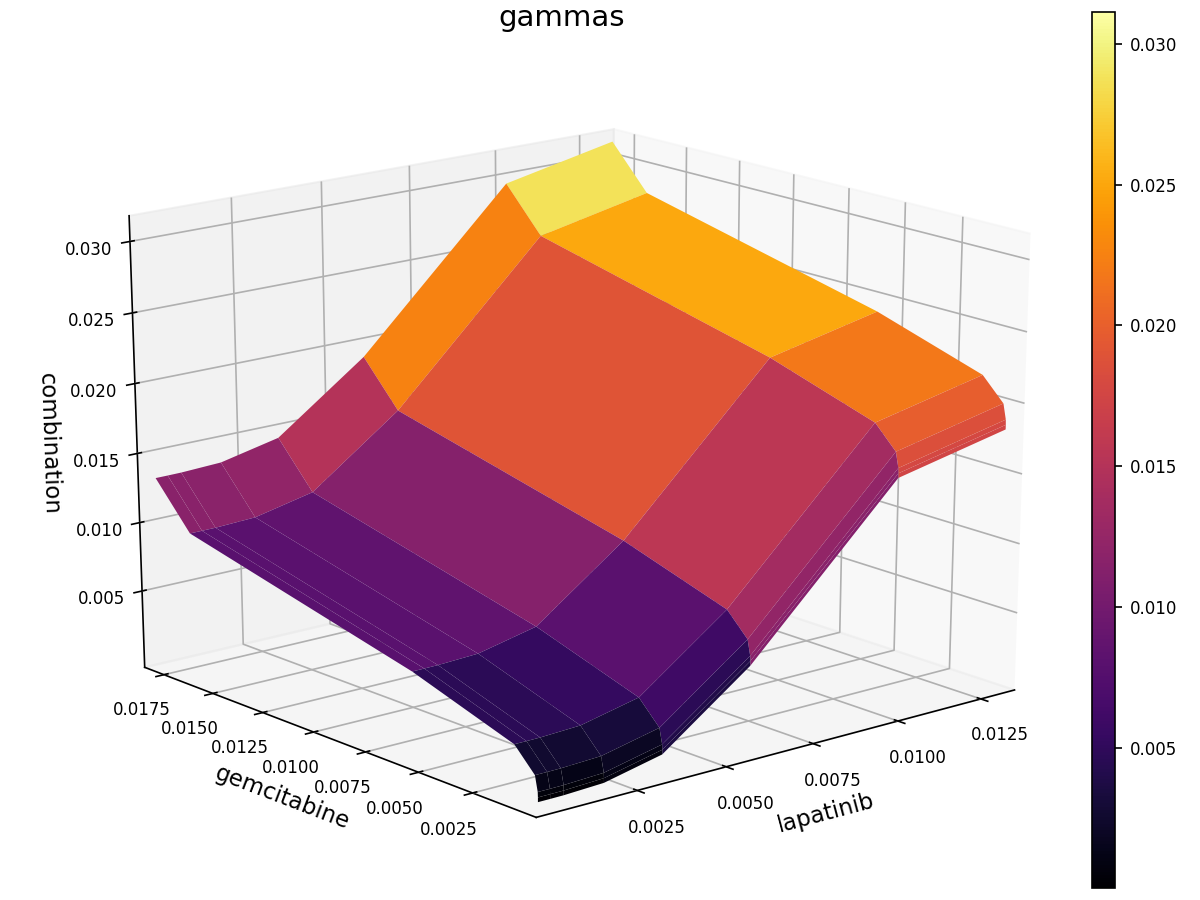

In [36]:
plot3D(parsL, parsG, 3, "gammas")
savefig("gamma.png")

In [123]:
ddeparam = DDEcombinationParam(combin, parsL, parsG);

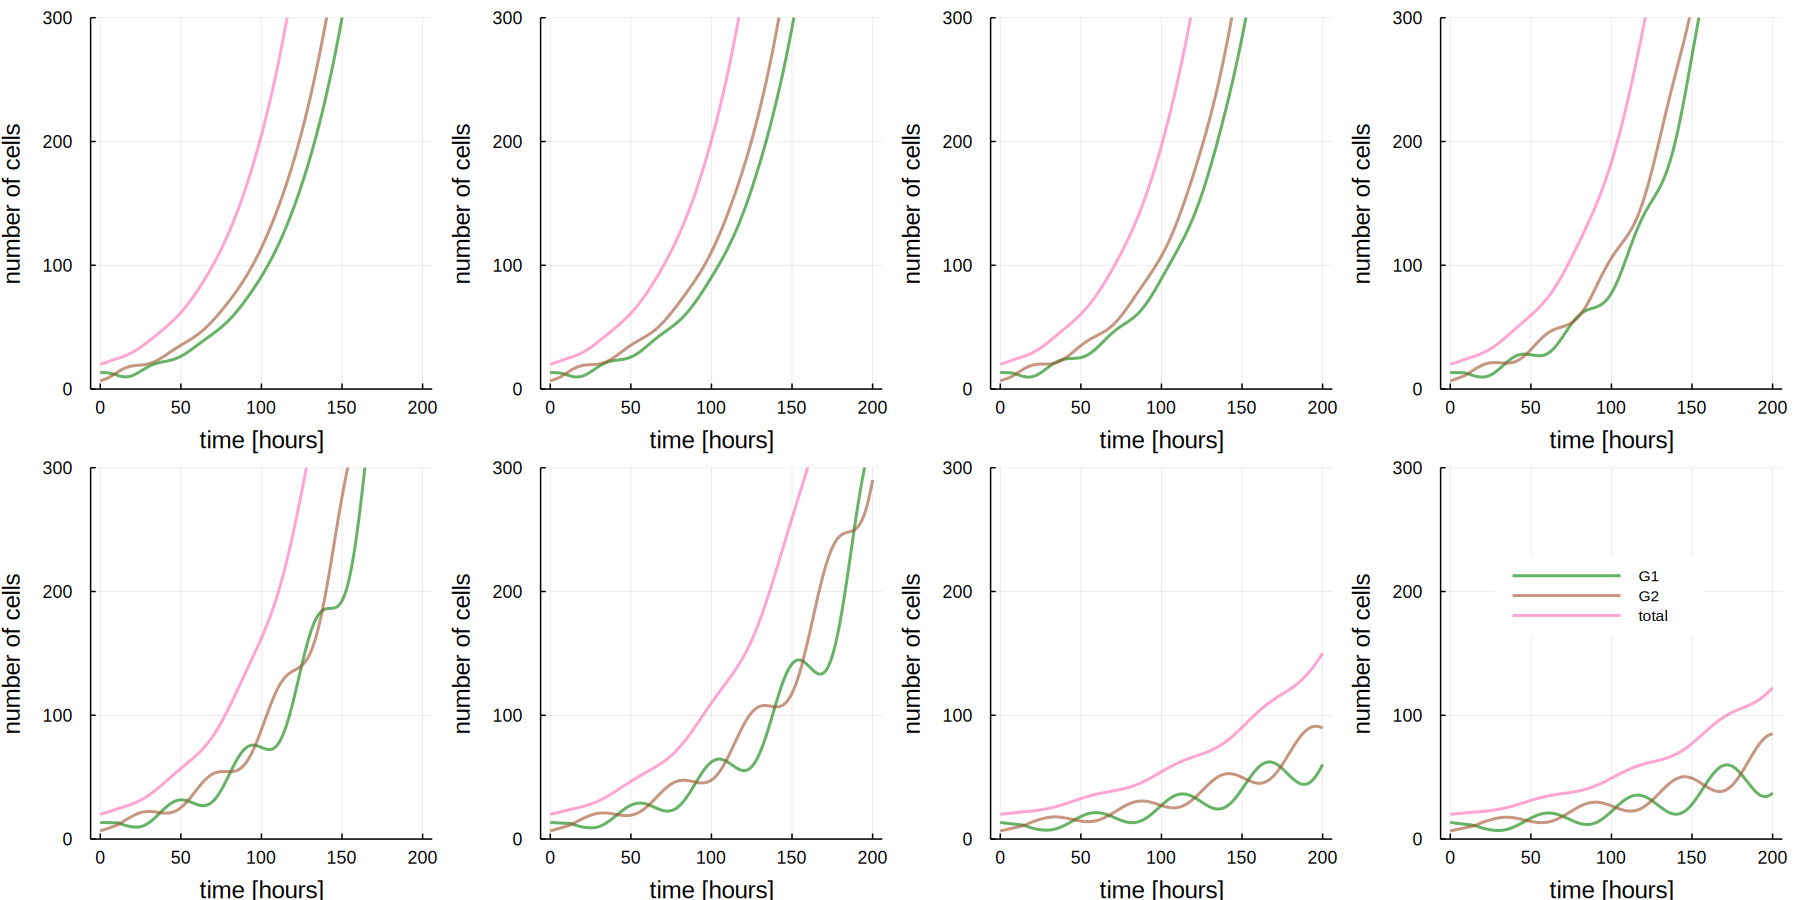

In [124]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 1)

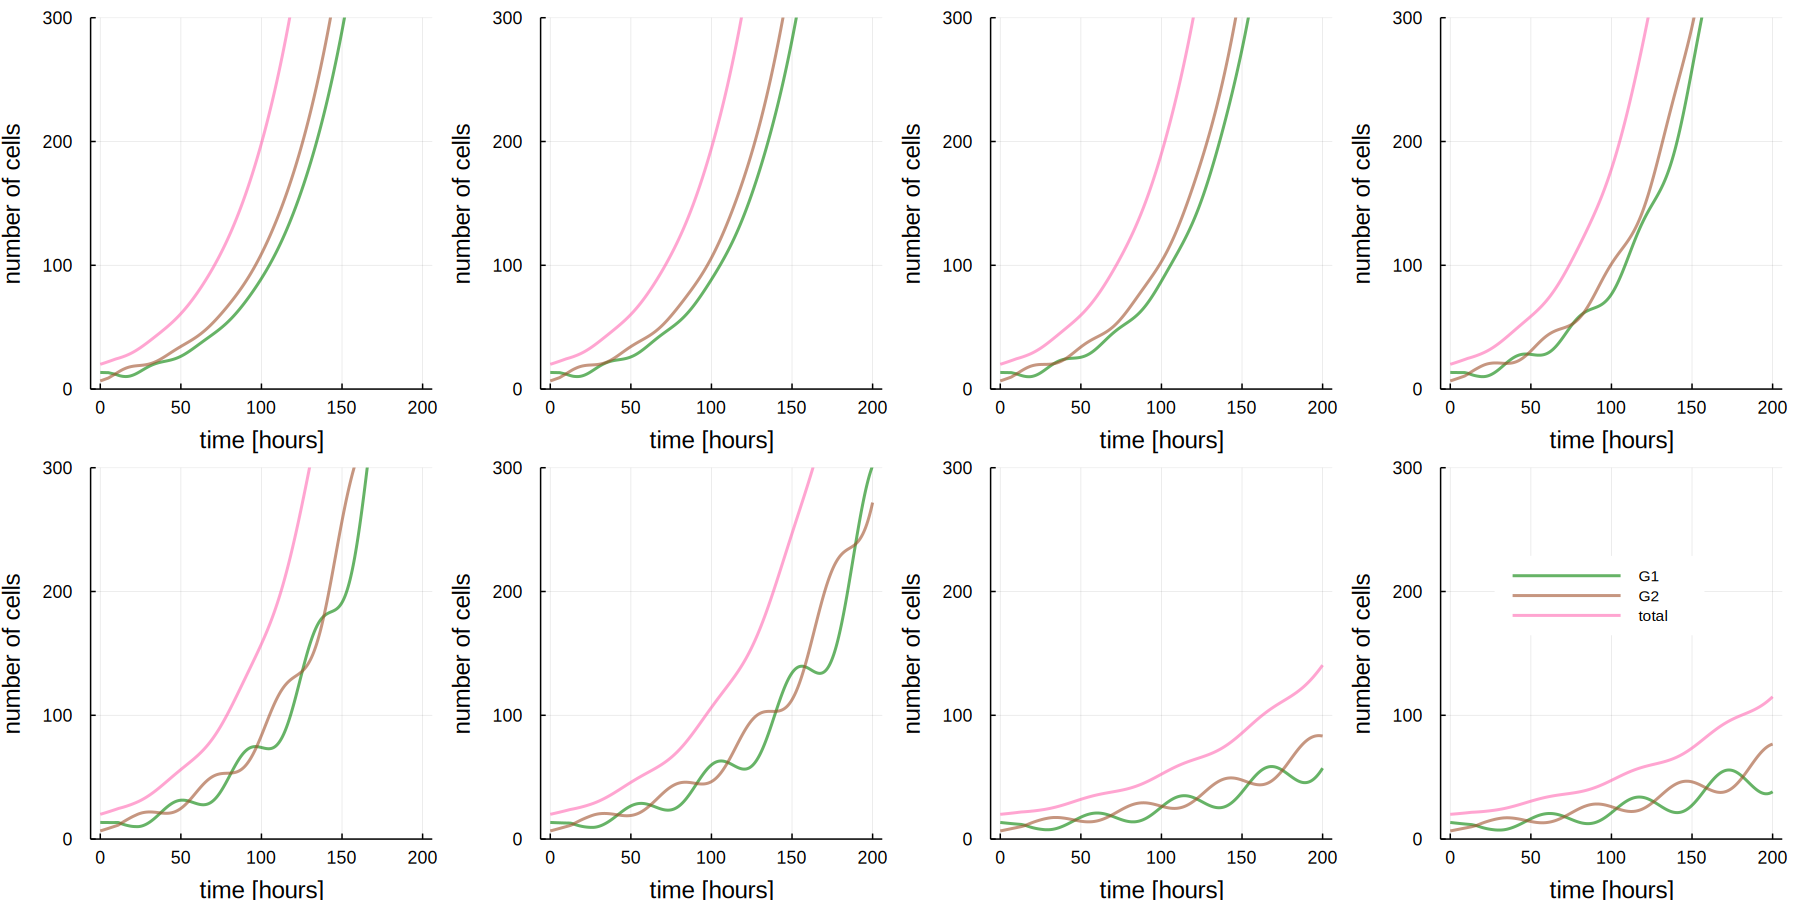

In [125]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 2)

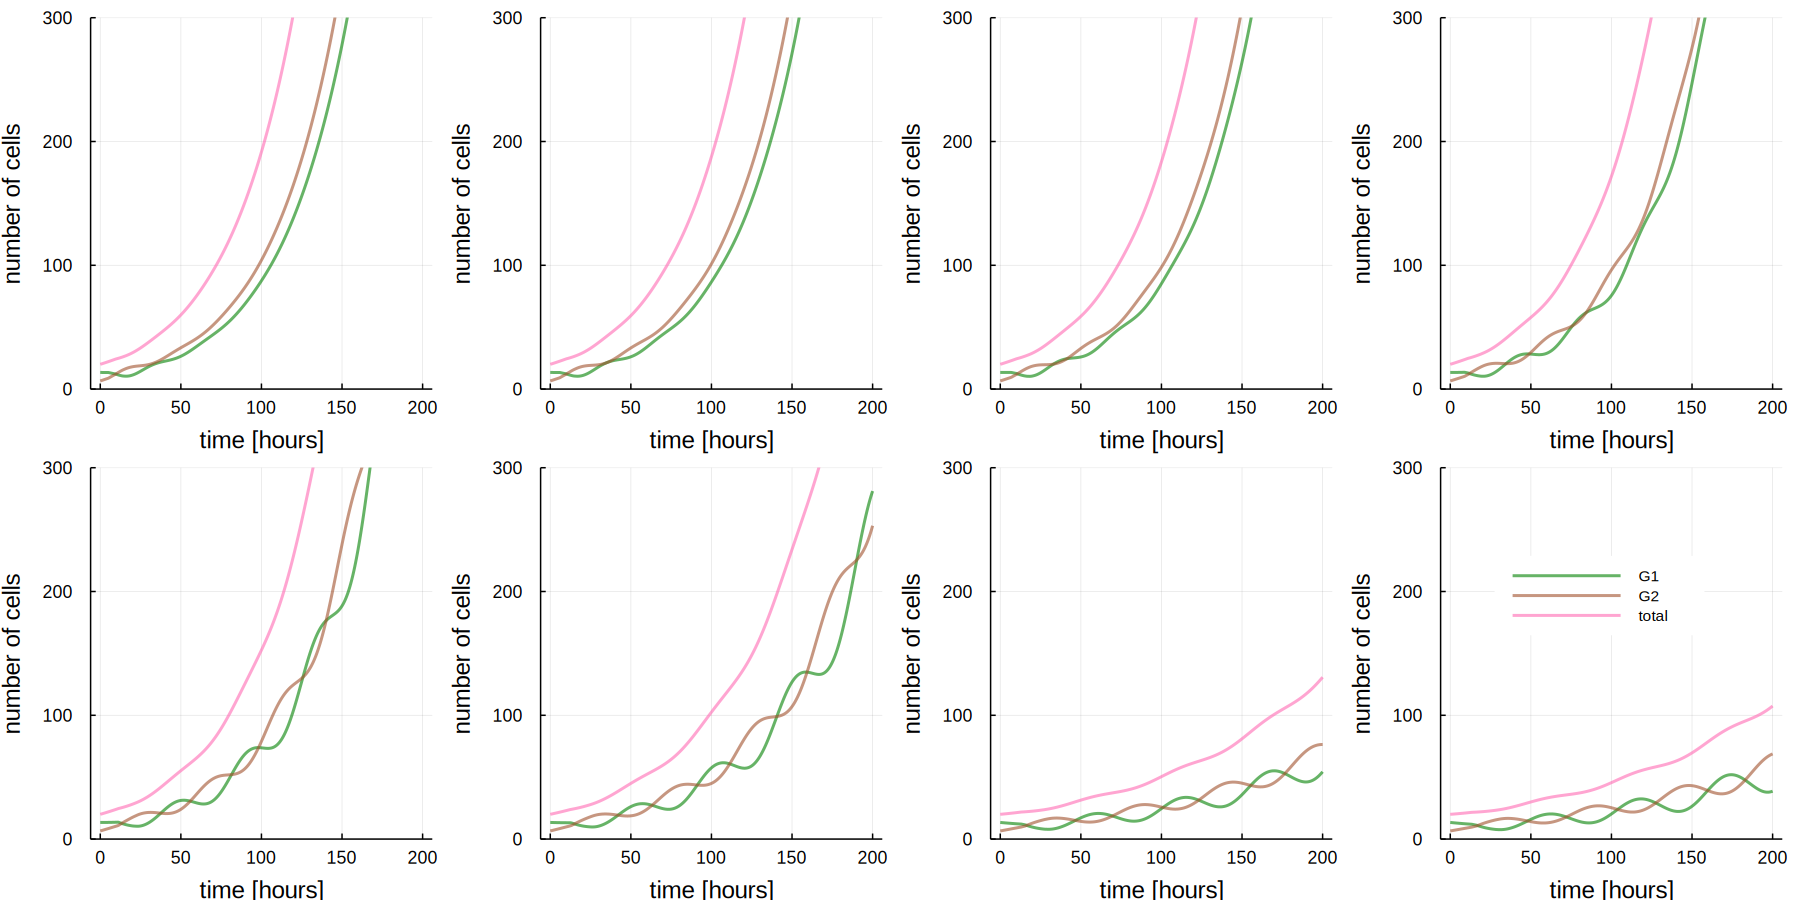

In [126]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 3)

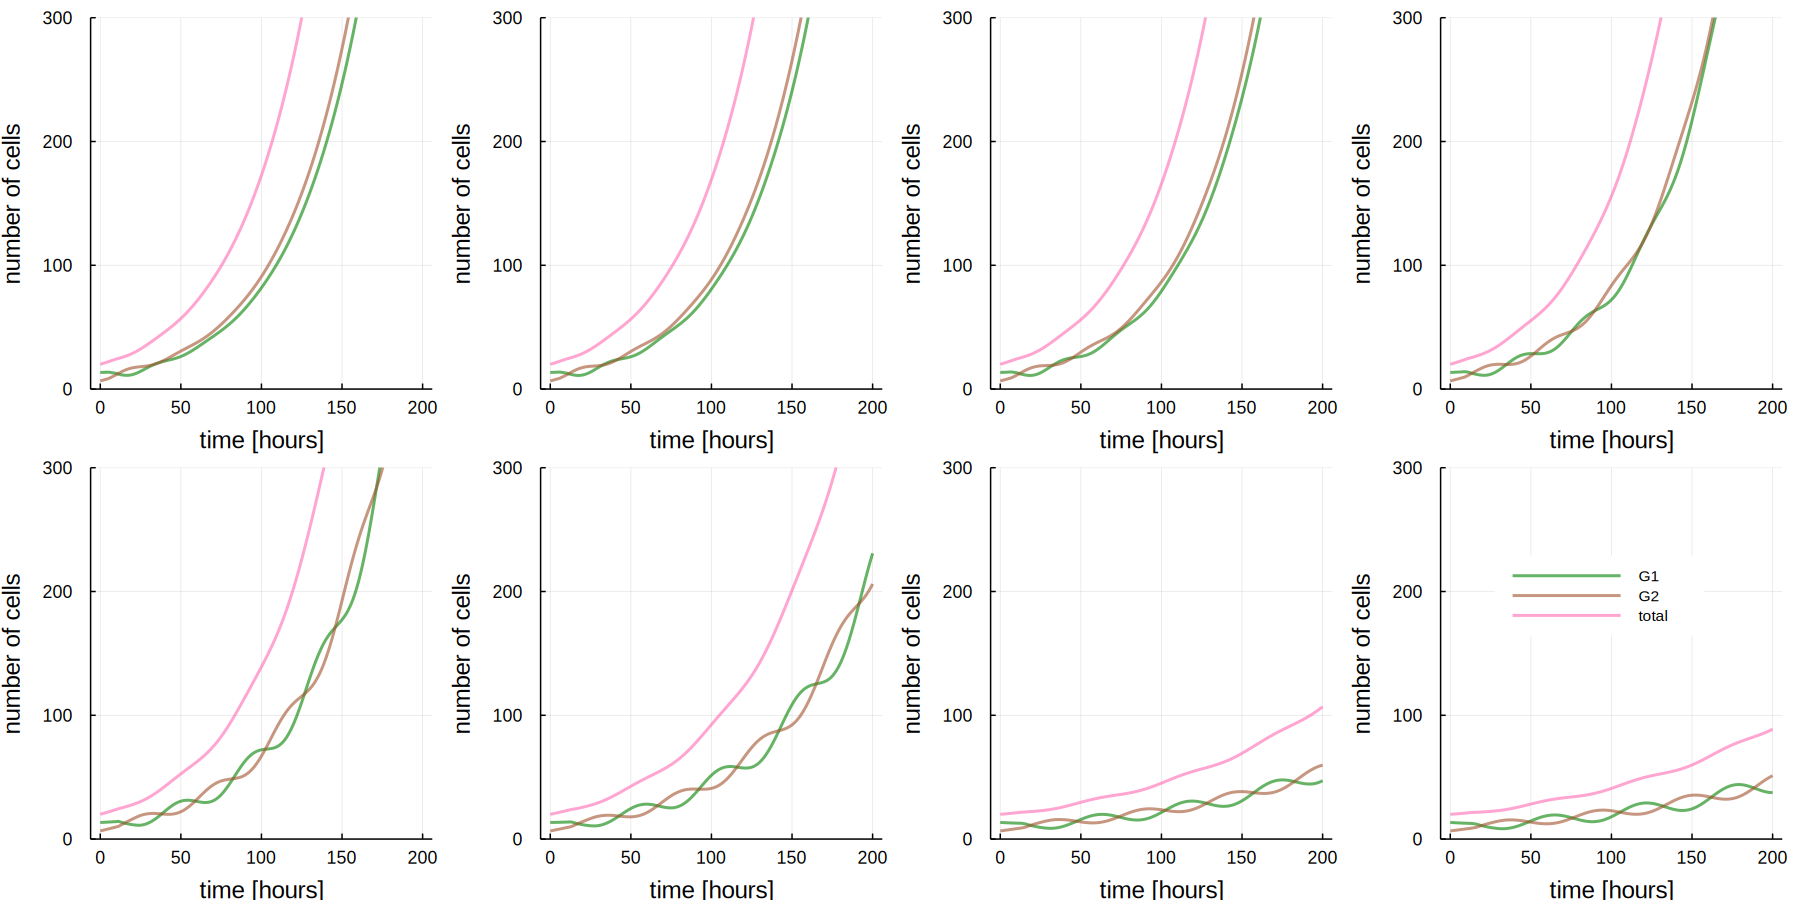

In [127]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 4)

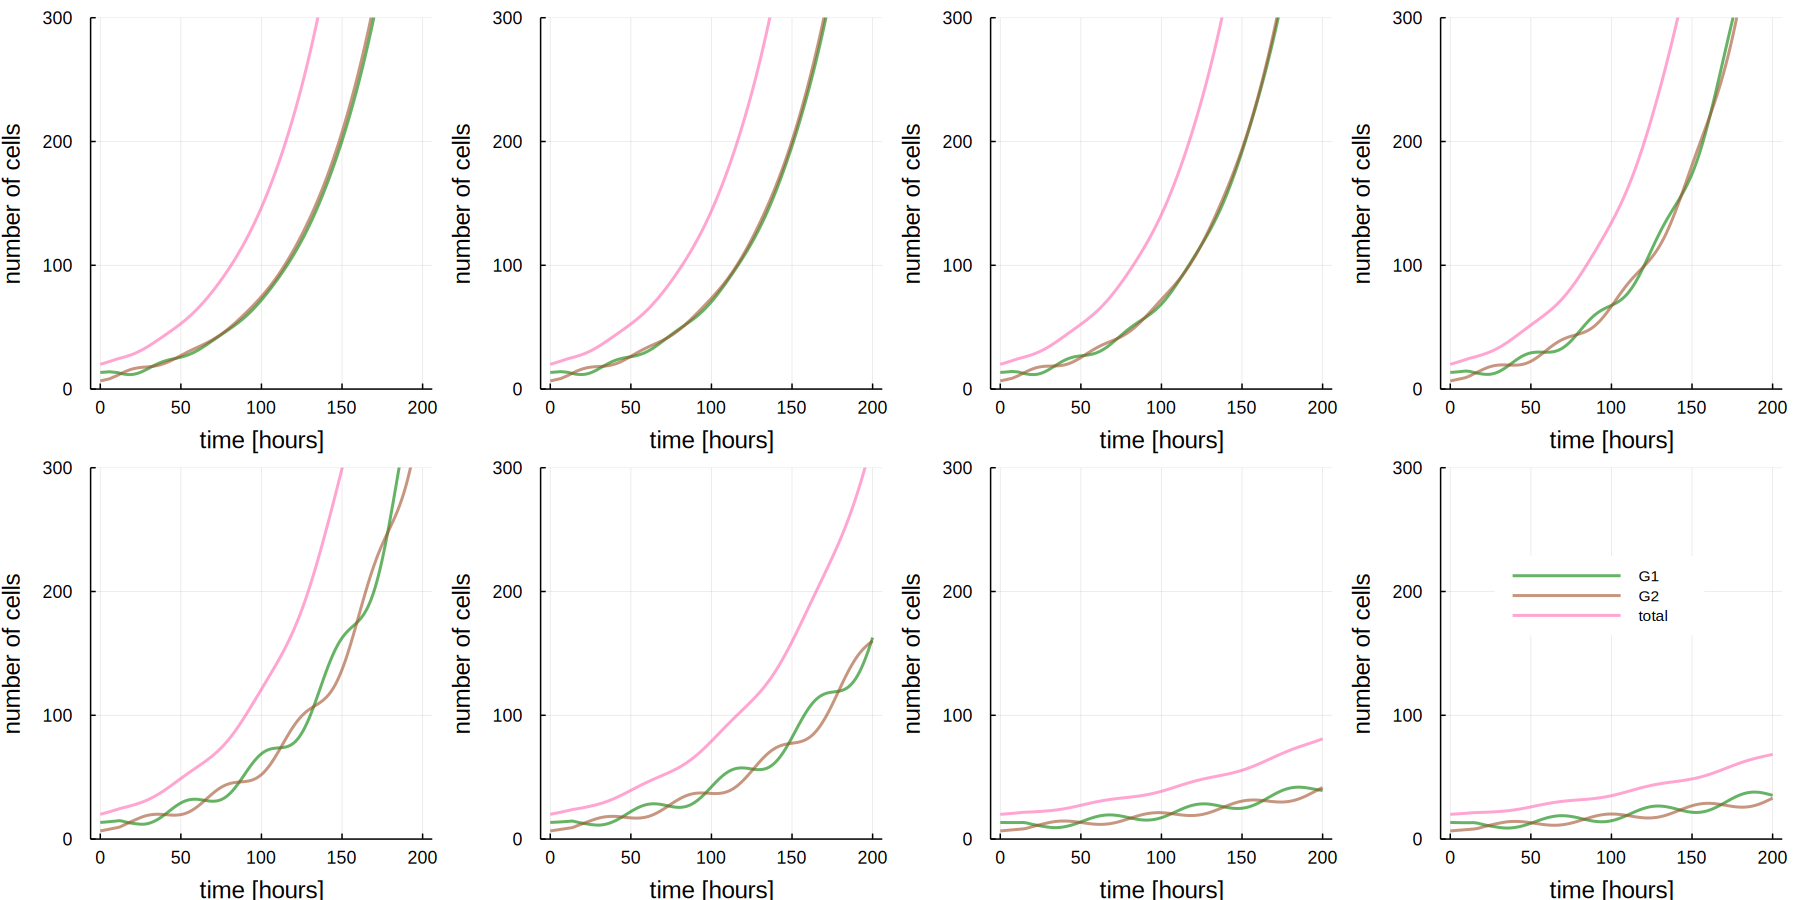

In [128]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 5)

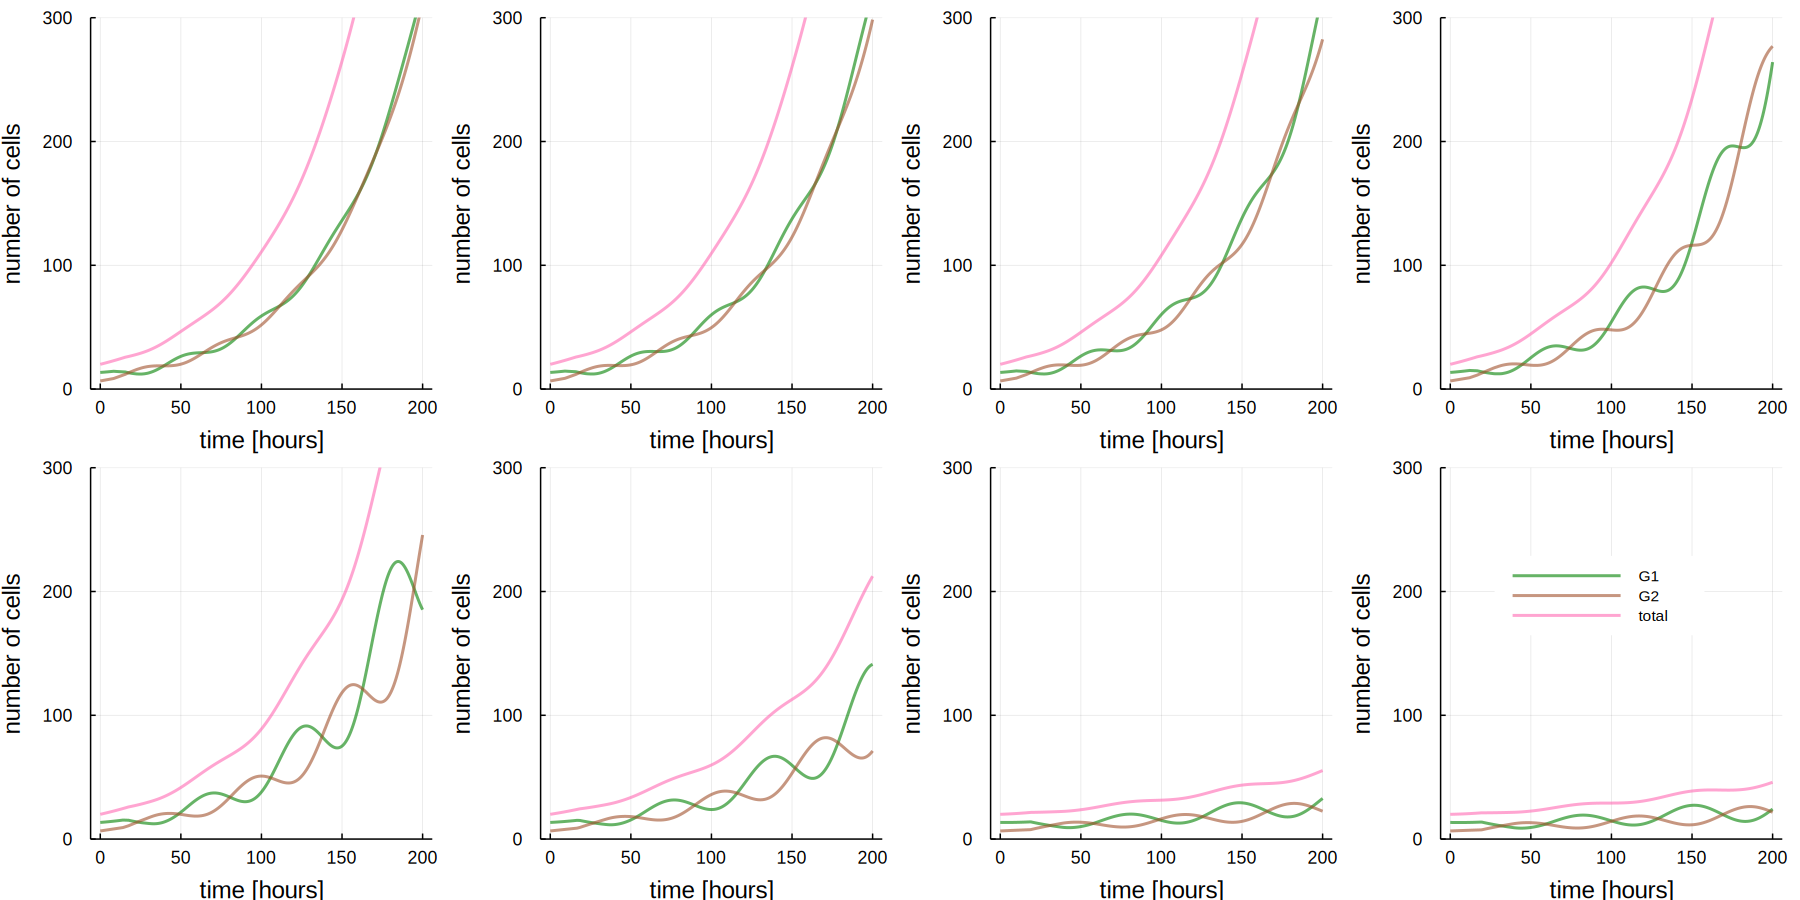

In [129]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 6)

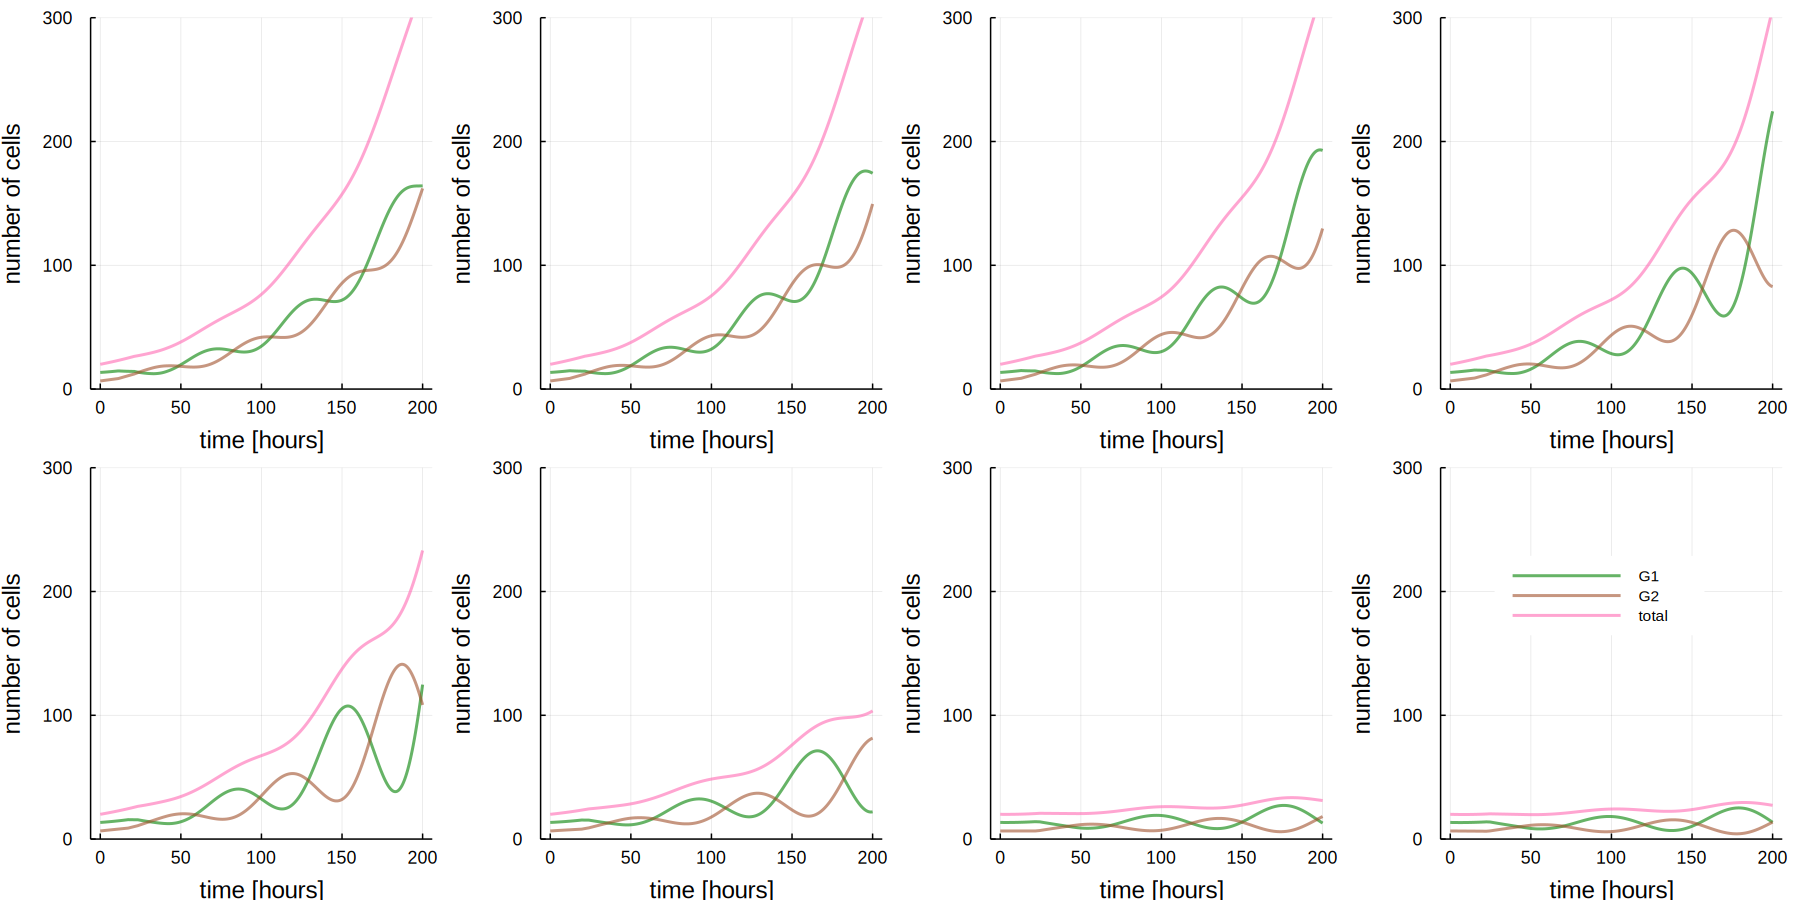

In [130]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 7)

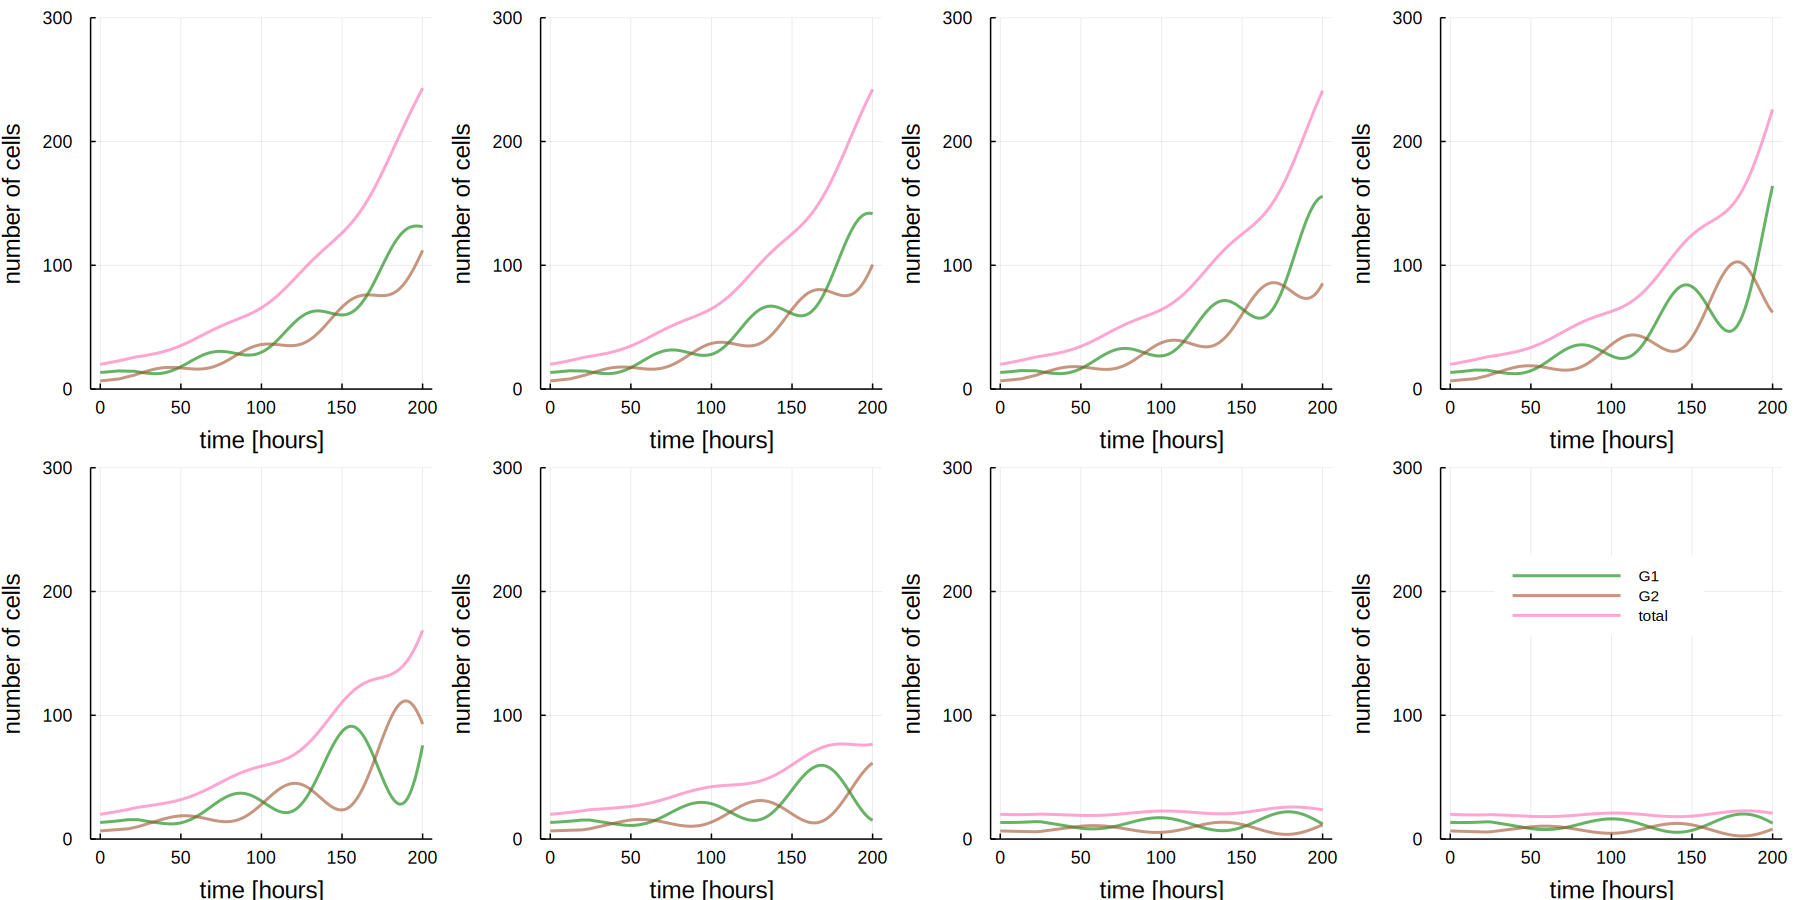

In [131]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 8)